In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import ifqi.envs as envs
import ifqi.models as md
from ifqi.utils.datasetGenerator import DatasetGenerator
from ifqi.fqi.FQI import FQI
import ifqi.evaluation.evaluation as evaluate

In [25]:
mdp = envs.LQG1D()

In [26]:
stateDim, actionDim = envs.getSpaceInfo(mdp)

In [27]:
stateDim, actionDim

(1, 1)

In [28]:
model = make_pipeline(PolynomialFeatures(2), Ridge())

In [29]:
dataset = DatasetGenerator(mdp)
dataset.generate(n_episodes=100)

In [30]:
mdp.gamma, mdp.horizon

(0.99, 100)

In [31]:
dataset.sastr

(matrix([[  5.83980884,  -5.23966874,   0.76392749,   0.        ],
         [  0.76392749,   4.84561105,   5.46498108,   0.        ],
         [  5.46498108,   3.36148848,   8.86839676,   0.        ],
         ..., 
         [  2.8798684 ,  -6.4695538 ,  -3.70918393,   0.        ],
         [ -3.70918393,   6.82733502,   3.1373224 ,   0.        ],
         [  3.1373224 ,   7.98977713,  11.29105845,   0.        ]]),
 array([-55.40174623, -21.65717846, -37.04906066, ..., -45.13389159,
        -54.333494  , -66.31139744]))

In [32]:
mdp.action_space

Box(1,)

In [33]:
mdp.observation_space

Box(1,)

In [34]:
actions = np.linspace(-8, 8, 100)

In [35]:
actions

array([-8.        , -7.83838384, -7.67676768, -7.51515152, -7.35353535,
       -7.19191919, -7.03030303, -6.86868687, -6.70707071, -6.54545455,
       -6.38383838, -6.22222222, -6.06060606, -5.8989899 , -5.73737374,
       -5.57575758, -5.41414141, -5.25252525, -5.09090909, -4.92929293,
       -4.76767677, -4.60606061, -4.44444444, -4.28282828, -4.12121212,
       -3.95959596, -3.7979798 , -3.63636364, -3.47474747, -3.31313131,
       -3.15151515, -2.98989899, -2.82828283, -2.66666667, -2.50505051,
       -2.34343434, -2.18181818, -2.02020202, -1.85858586, -1.6969697 ,
       -1.53535354, -1.37373737, -1.21212121, -1.05050505, -0.88888889,
       -0.72727273, -0.56565657, -0.4040404 , -0.24242424, -0.08080808,
        0.08080808,  0.24242424,  0.4040404 ,  0.56565657,  0.72727273,
        0.88888889,  1.05050505,  1.21212121,  1.37373737,  1.53535354,
        1.6969697 ,  1.85858586,  2.02020202,  2.18181818,  2.34343434,
        2.50505051,  2.66666667,  2.82828283,  2.98989899,  3.15

In [36]:
fqi = FQI(estimator=model,
          stateDim=stateDim,
          actionDim=actionDim,
          discreteActions=actions,
          gamma=mdp.gamma,
          horizon=mdp.horizon,
          verbose=True,
          features=None,
          scaled=True)

Iteration 2
	performance -63.999436381992986
	performance -1.3411929059457948
	performance -26.38588613353694
	performance -76.92164490178622
	performance -80.51436908506791
	performance -71.8885821673459
	performance -17.157032230441267
	performance -23.868838918659282
	performance -106.50494273355535
	performance -31.687011158481923
Iteration 3
	performance -103.08320331078313
	performance -1.5154277457748713
	performance -1.4318214217655654
	performance -10.079020027746456
	performance -142.44576541866493
	performance -136.48354258692902
	performance -35.39042209982839
	performance -27.024873704969647
	performance -7.635303820902953
	performance -4.999732153663772


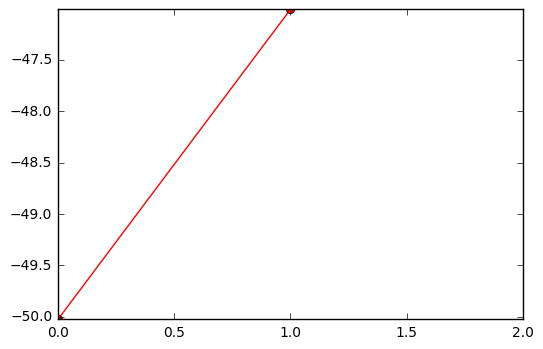

Iteration 4
	performance -5.72603548970581
	performance -25.96736065053835
	performance -1.2061284389032818
	performance -20.75232152512591
	performance -22.20449874154005
	performance -24.923431458764046
	performance -3.1252224732625438
	performance -71.24815452125115
	performance -39.90148559372635
	performance -11.68016036698789
Iteration 5
	performance -22.82771874013656
	performance -32.64030388435399
	performance -7.429414454225278
	performance -8.190664752431568
	performance -1.9594592708214704
	performance -102.51959810340017
	performance -24.952782013549637
	performance -97.26194061918271
	performance -116.72110343469978
	performance -143.55366807078613
Iteration 6
	performance -1.8712679035428461
	performance -10.097205173150167
	performance -33.378968350493736
	performance -133.04128507425446
	performance -55.15450166878364
	performance -6.448843457960952
	performance -151.55765189571127
	performance -2.7948891910381772
	performance -83.95530493264894
	performance -143.69051

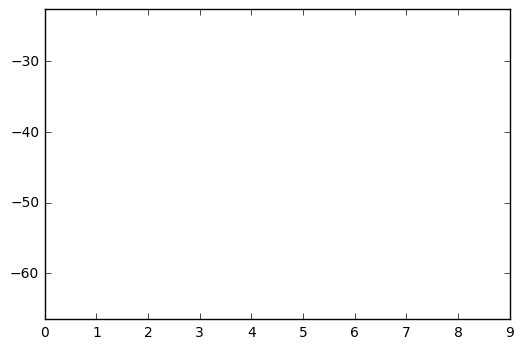

In [38]:
fqi.partial_fit(*dataset.sastr)

fitParams = {}
iterations=10
iterationValues = []
for i in range(iterations - 1):
    fqi.partial_fit(None, None, **fitParams)
    values = evaluate.evaluate_policy(mdp, fqi, nbEpisodes=10)
    iterationValues.append(values[0])

    if i == 1:
        fig1 = plt.figure(1)
        ax = fig1.add_subplot(1, 1, 1)
        h = ax.plot(range(i + 1), iterationValues, 'ro-')
        plt.ylim(min(iterationValues), max(iterationValues))
        plt.xlim(0, i + 1)
        plt.ion()  # turns on interactive mode
        plt.show()
    elif i > 1:
        h[0].set_data(range(i + 1), iterationValues)
        ax.figure.canvas.draw()
        plt.ylim(min(iterationValues), max(iterationValues))
        plt.xlim(0, i + 1)
        # plt.show()